In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='talk', style='whitegrid', color_codes=True)

In [2]:
mpl.rcParams['figure.figsize'] = (10,6)

In [3]:
def import_sn_data(fpath='sn_data.txt'):
    df = pd.read_csv(fpath, sep='\s+', index_col=0, na_values=['...', 'NaN'])
    df = clean_sn_data(df)
    return df
    
    
def clean_sn_data(df):
    df = (df
          .iloc[:,[0,1,9,10,14]]
          .loc[~df['v_siII'].isnull(), :]
         )
    return df

sn_data = import_sn_data()

In [4]:
from scipy.stats import norm

def gaussian(x, mu, sigma):
    return norm.pdf(x, mu, sigma)

def bimodal_gaussian(x, mu1, mu2, sigma1=1, sigma2=1, g=0.5):
    """Bimodal independent gaussian"""
    return g*gaussian(x, mu1, sigma1) + (1-g)*gaussian(x, mu2, sigma2)

[1.0909942  0.10434258]


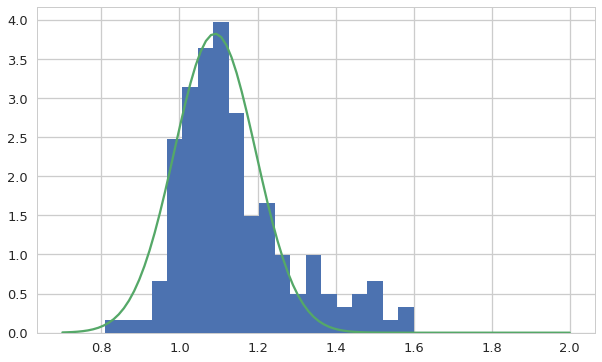

In [5]:
from scipy.optimize import curve_fit

x = sn_data[(sn_data['v_siII'] < 2) & (sn_data['v_siII'] >0.7)]['v_siII']

ydata, xdata = np.histogram(x, bins=20, density=True)
xdata = (xdata[:-1] + xdata[1:]) / 2
opt, cov = curve_fit(gaussian, xdata, ydata, p0=[np.mean(x), np.std(x)])

xrange = np.linspace(0.7, 2, 100)
plt.hist(x, density=True, bins=20)
plt.plot(xrange, gaussian(xrange, *opt))
print(opt)

[1.07405179 1.28212612 0.07456768 0.17471453 0.66401607]


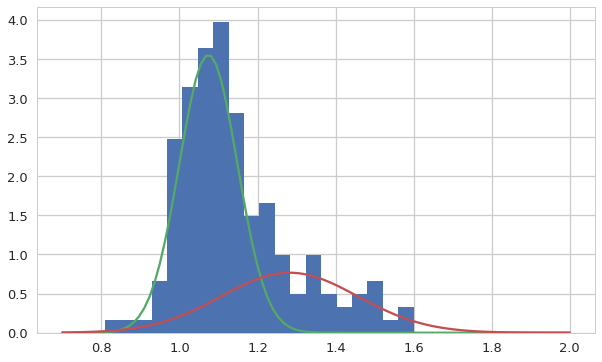

In [9]:
opt, cov = curve_fit(bimodal_gaussian, xdata, ydata, p0=[1.1, 1.5, 1, 1, 0.5])

xrange = np.linspace(0.7, 2, 100)
plt.hist(x, density=True, bins=20)
# plt.plot(xrange, bimodal_gaussian(xrange, *opt))
plt.plot(xrange, opt[4]*gaussian(xrange, opt[0], opt[2]))
plt.plot(xrange, (1-opt[4])*gaussian(xrange, opt[1], opt[3]))
print(opt)

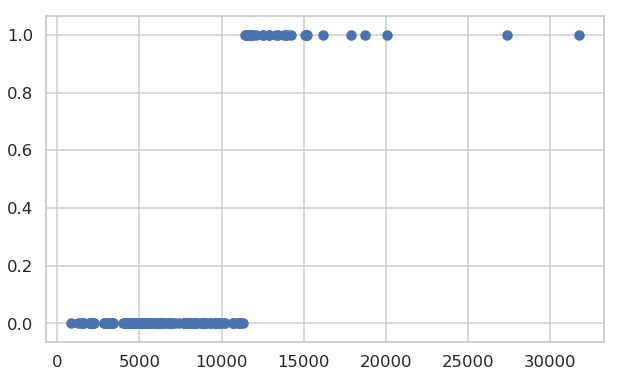

In [176]:
from scipy.stats import norm
from sklearn.mixture import GaussianMixture

clf = GaussianMixture(n_components=2)
clf.fit(x[:, np.newaxis])

plt.scatter(x, clf.predict(x[:, np.newaxis]))